In [1]:
import pandas as pd
#Read the dataset
benefits_data =pd.read_csv('CompensationBenefits.csv')

In [2]:
benefits_data.shape

(36, 5)

In [3]:
print("Columns in dataset:",benefits_data.columns)

Columns in dataset: Index(['Rating', 'WorkLifeBalance', 'PerformanceReward', 'RetirementBenefits',
       'HealthCareBenefits'],
      dtype='object')


In [4]:
#Determine  categories for  variables
print("Categories in Work Life Balance:",benefits_data['WorkLifeBalance'].unique())
print("Categories in PerformanceReward:",benefits_data['PerformanceReward'].unique())
print("Categories in RetirementBenefits:",benefits_data['RetirementBenefits'].unique())
print("Categories in HealthCareBenefits:",benefits_data['HealthCareBenefits'].unique())

Categories in Work Life Balance: ['InflexibleHours' 'FlexibleHours']
Categories in PerformanceReward: ['IncentiveSystem' 'PayPlan' 'Commission']
Categories in RetirementBenefits: ['BenefitPlan' 'ContributionPlan']
Categories in HealthCareBenefits: ['LifeInsurance' 'MedicalInsurance ' 'HealthSavingAccount']


In [5]:
#Diplay thr records
print("Information of dataset:\n",benefits_data.info)

Information of dataset:
 <bound method DataFrame.info of     Rating  WorkLifeBalance PerformanceReward RetirementBenefits  \
0        1  InflexibleHours   IncentiveSystem        BenefitPlan   
1        1  InflexibleHours   IncentiveSystem   ContributionPlan   
2        1  InflexibleHours   IncentiveSystem        BenefitPlan   
3        1  InflexibleHours   IncentiveSystem   ContributionPlan   
4        2  InflexibleHours   IncentiveSystem        BenefitPlan   
5        2  InflexibleHours   IncentiveSystem   ContributionPlan   
6        2  InflexibleHours           PayPlan        BenefitPlan   
7        2  InflexibleHours           PayPlan   ContributionPlan   
8        2  InflexibleHours           PayPlan        BenefitPlan   
9        3  InflexibleHours           PayPlan   ContributionPlan   
10       3  InflexibleHours           PayPlan        BenefitPlan   
11       3  InflexibleHours           PayPlan   ContributionPlan   
12       3  InflexibleHours        Commission        Benefi

In [6]:
#Measure Part-Woth Utilities of Each Level Using Conjoint Analysis
#Create dummy variables
benefits_new =pd.get_dummies(benefits_data) #getdummies function creates new columns according to the number of categories for each variable.

In [7]:
benefits_new.shape

(36, 11)

In [8]:
benefits_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Rating                                  36 non-null     int64
 1   WorkLifeBalance_FlexibleHours           36 non-null     uint8
 2   WorkLifeBalance_InflexibleHours         36 non-null     uint8
 3   PerformanceReward_Commission            36 non-null     uint8
 4   PerformanceReward_IncentiveSystem       36 non-null     uint8
 5   PerformanceReward_PayPlan               36 non-null     uint8
 6   RetirementBenefits_BenefitPlan          36 non-null     uint8
 7   RetirementBenefits_ContributionPlan     36 non-null     uint8
 8   HealthCareBenefits_HealthSavingAccount  36 non-null     uint8
 9   HealthCareBenefits_LifeInsurance        36 non-null     uint8
 10  HealthCareBenefits_MedicalInsurance     36 non-null     uint8
dtypes: int64(1), uint8(10

In [9]:
#Creating dependent variable
Rating = benefits_new['Rating']

In [10]:
#Delete 'Rating' and other columns from the dataset
cols_not_reqd = ['Rating','WorkLifeBalance_FlexibleHours','PerformanceReward_Commission','RetirementBenefits_BenefitPlan',
                'HealthCareBenefits_HealthSavingAccount']

In [11]:
benefits_new.drop(labels = cols_not_reqd,axis=1,inplace =True)

In [12]:
print("New Dimension of Indepdendent varibales:",benefits_new.shape)

New Dimension of Indepdendent varibales: (36, 6)


In [13]:
#Create the OLS Model
import statsmodels.api as sm

In [14]:
model = sm.OLS(Rating, benefits_new).fit()

In [15]:
#Dsiplay summary of the model
print("Summary of the model:\n", model.summary())

Summary of the model:
                                  OLS Regression Results                                
Dep. Variable:                 Rating   R-squared (uncentered):                   0.622
Model:                            OLS   Adj. R-squared (uncentered):              0.546
Method:                 Least Squares   F-statistic:                              8.219
Date:                Thu, 21 Dec 2023   Prob (F-statistic):                    2.63e-05
Time:                        13:20:27   Log-Likelihood:                         -95.777
No. Observations:                  36   AIC:                                      203.6
Df Residuals:                      30   BIC:                                      213.1
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                           coef    std err          t      P>|t|      [0.025     

# Observations
1.Utility of Inflexible Hours is 2.1984 uitls less than Flexible Hours
2.Utility of Science if 0.7024 utils more than commission
3.Utility of PayPlan is 2.202 utils more than commission
4.Utiity of ContributionPlan is 2.690 utils more than BenefitPlan
5.Utility of LifeInsurance is 3.36 utils more than HealthSavingsAccount
6.Utility of MedicalInsurance is 3.78 utils more than HealthSavingsAccount

Text(0.5, 0.98, 'Utility of Different Plans')

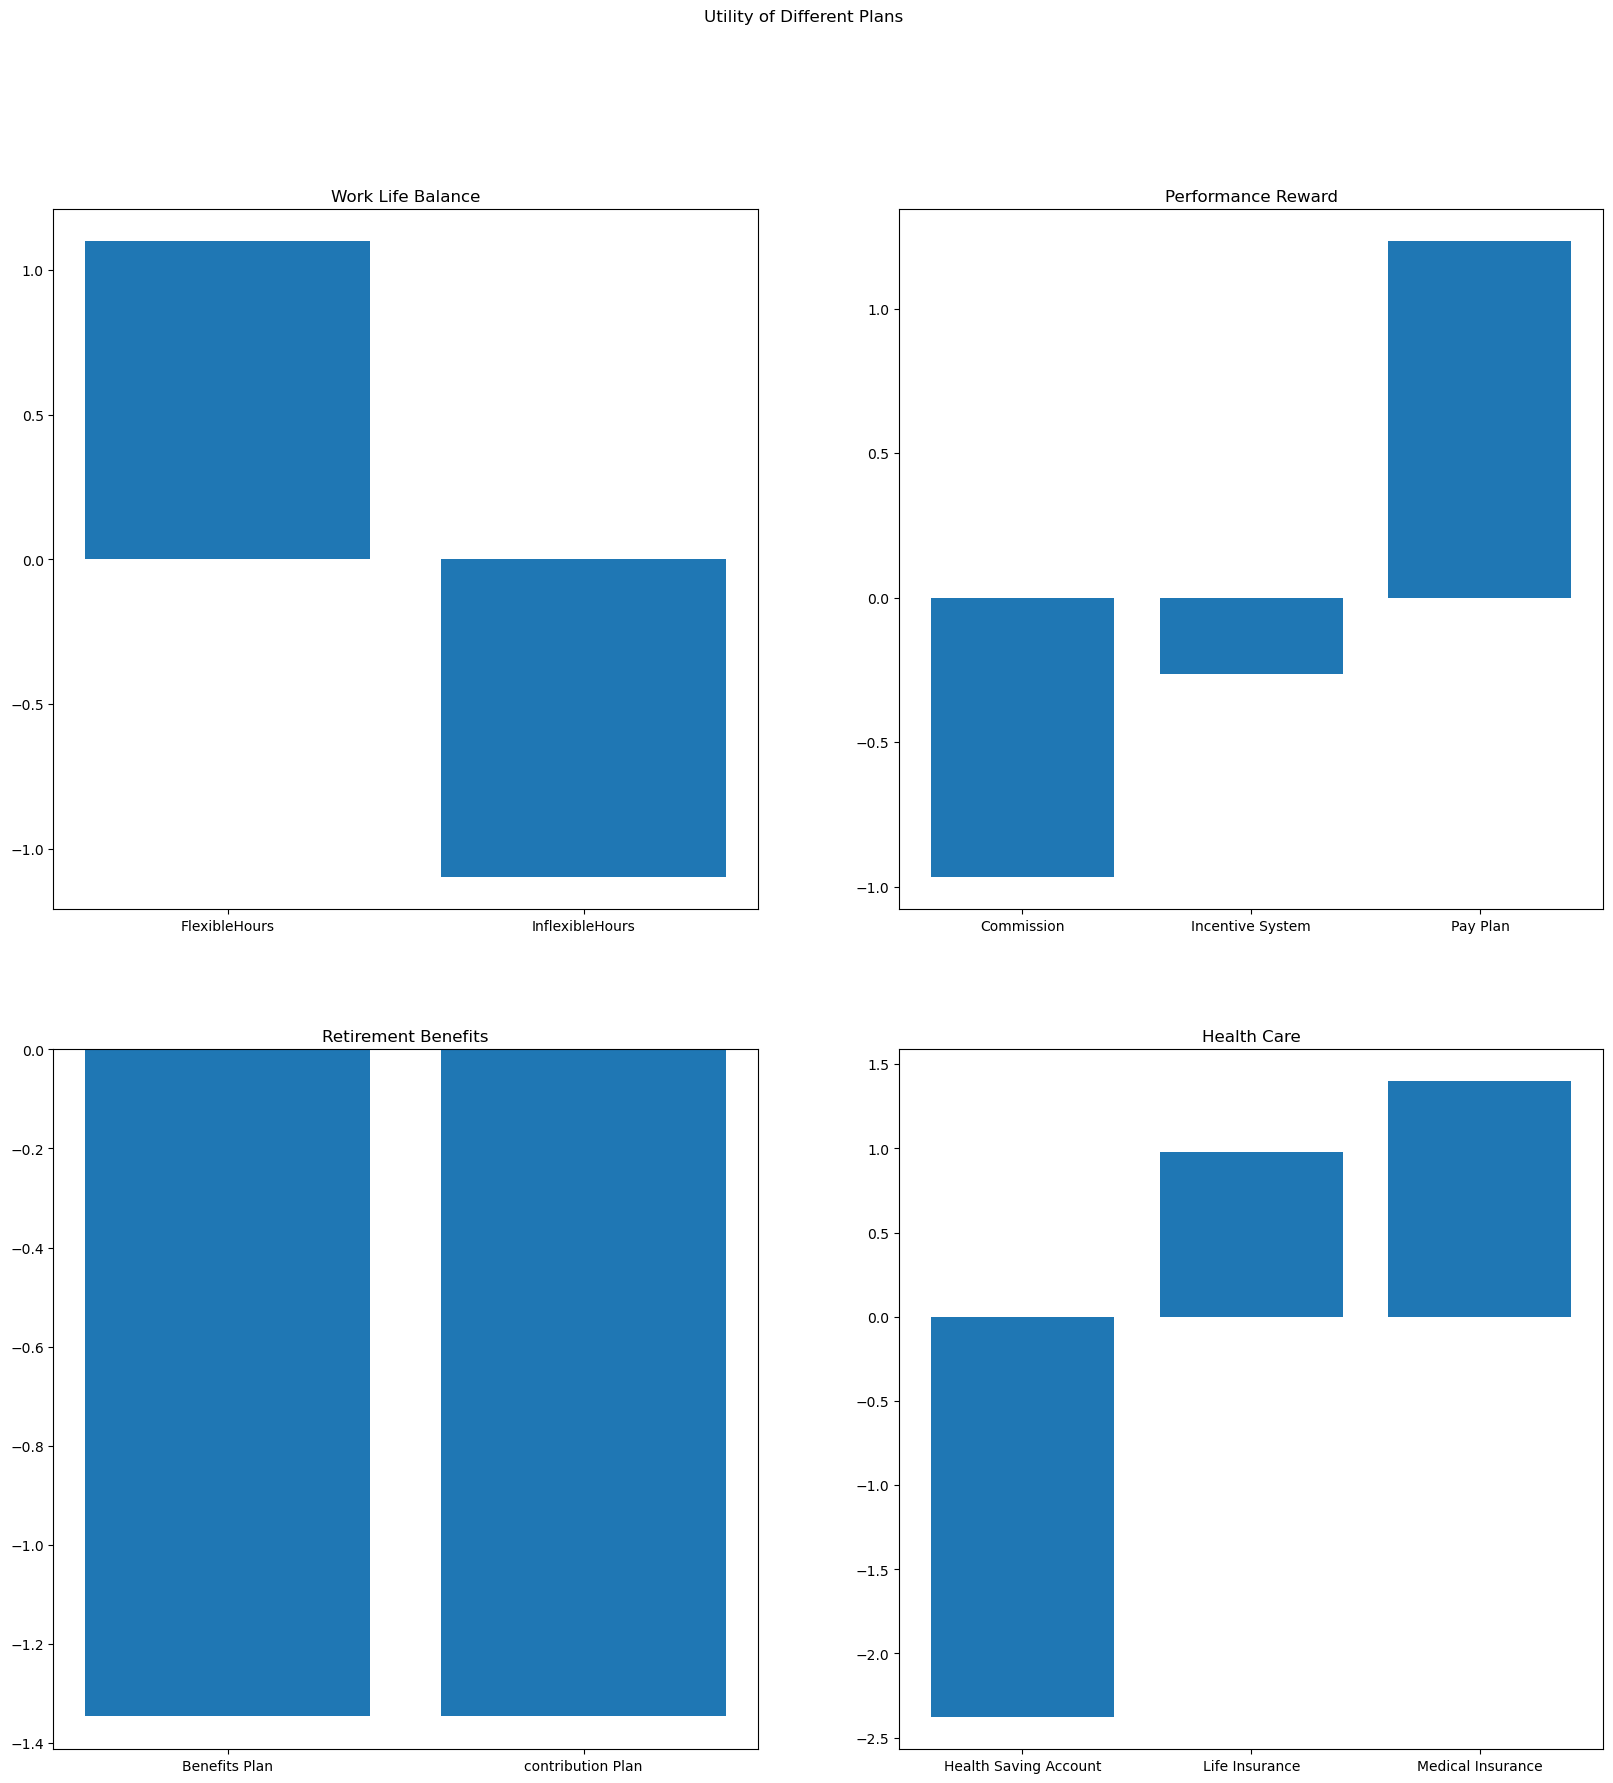

In [16]:
#Creating a chart for displaying rhe utilites of each category
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.bar(['FlexibleHours','InflexibleHours'],[1.0992,-1.0992])
plt.title("Work Life Balance")
plt.subplot(222)
plt.bar(["Commission","Incentive System","Pay Plan"],[-0.968,-0.265,1.234])
plt.title("Performance Reward")
plt.subplot(223)
plt.bar(["Benefits Plan","contribution Plan"],[-1.345,-1.345])
plt.title("Retirement Benefits")
plt.subplot(224)
plt.bar(["Health Saving Account","Life Insurance","Medical Insurance"],[-2.38,0.98,1.40])
plt.title("Health Care")''
plt.suptitle("Utility of Different Plans")

# Observations
1.It is clear from the chart that the utility of flexible hours is more than that of inflexible hours
2.Utilityof PayPlan is more than that of  commission and incentive system
3.The utility of contribution plan is more than that of life insurance and health savings account.
Hence these are considered as preferred variables by the employees.


# Analysis
The higher the value, the higher the importance of the attribute in the perception of employees.
Since for the work-life balance attribute,flexible hours has got the maximum utility &
for the performance reward attribute, the payp plan level has got the maximum utility.
This means that while selecting compensation and benefits plan by the employees, the highest preference is given to flexible hours and pay plan.

([<matplotlib.patches.Wedge at 0x1fc38bb4880>,
 [Text(0.88542649434533, 0.6527020170884562, 'Work Life Balance'),
  Text(-0.3625259566333145, 1.038544621461736, 'Performance Reward'),
  Text(-1.0826997505421392, -0.1943225416054193, 'Retirement Benefits'),
  Text(0.5050036248549203, -0.9772263498716105, 'Helath Care')],
 [Text(0.4829599060065436, 0.35601928204824884, '20.2%'),
  Text(-0.1977414308908988, 0.5664788844336741, '20.3%'),
  Text(-0.5905635002957121, -0.10599411360295598, '24.7%'),
  Text(0.27545652264813836, -0.5330325544754239, '34.8%')])

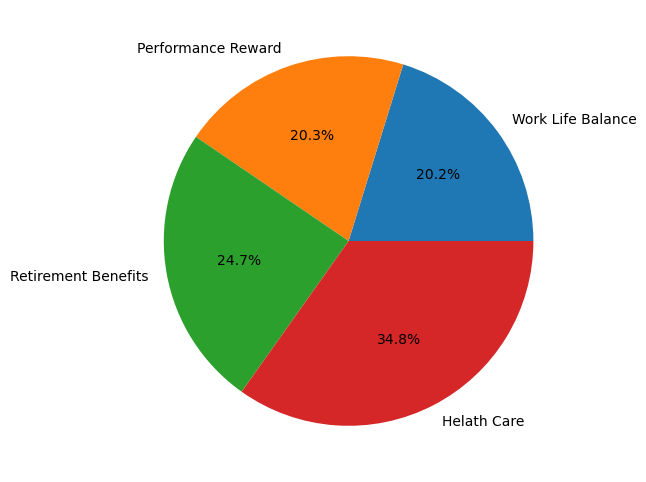

In [17]:
#Create Pie chart for depicting the importance of the attributes
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie([20.21,20.24,24.7,34.8],labels = ["Work Life Balance","Performance Reward","Retirement Benefits","Helath Care"],autopct='%1.1f%%')

# Observation
The total range of all atrributes is 10.877
The importance of work-life balance, performance reward, retirement and healthcare benefits is 20%,20%,24.7% and 34.8% respectively.
It is clear that emloyees gave the maximum preference to healthcare benefits